In [2]:
import pandas as pd
import requests
import tweepy

### Gathering

In [3]:
# Read the twitter enhanced archive
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

In [73]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_arch['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [5]:
pred_r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [76]:
with open('prediction_data.tsv', 'w') as outfile:
    outfile.write(pred_r.text)

In [185]:
prediction_table = pd.read_csv('prediction_data.tsv',sep='\t')
prediction_table.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
? pd.read_csv

In [14]:
# Use the tweepy to get tweet info

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [33]:
import json
t_error_id = []
tweet_dict = {}
tweet_dict['tweet'] = []
for t_id in twitter_arch['tweet_id']:
    try:
        tweet = api.get_status(t_id,tweet_mode='extended')
        tweet_dict['tweet'].append(tweet._json)
    except Exception as e:
        print("The id " + str(t_id) + " has problems")
        t_error_id.append(t_id)
with open('tweet_data.txt', 'w') as outfile:
    json.dump(tweet_dict, outfile)
    

The id 890971913173991426 has problems
The id 890729181411237888 has problems
The id 888202515573088257 has problems
The id 873697596434513921 has problems
The id 872668790621863937 has problems
The id 869988702071779329 has problems
The id 866816280283807744 has problems
The id 861769973181624320 has problems
The id 845459076796616705 has problems
The id 842892208864923648 has problems
The id 837012587749474308 has problems
The id 827228250799742977 has problems
The id 802247111496568832 has problems
The id 775096608509886464 has problems
The id 771004394259247104 has problems
The id 770743923962707968 has problems
The id 754011816964026368 has problems
The id 669661792646373376 has problems
The id 669625907762618368 has problems


In [92]:
tweet_json = tweet_dict['tweet']
tweet_json[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [106]:
tweet_json[0]['retweet_count']

8444

In [104]:
list_of_interests = ['retweet_count','favorite_count','id','retweeted']

In [115]:
panda_dict = {}
for interest in list_of_interests:
    panda_dict[interest] = []
for tweet in tweet_json:
    for interest in list_of_interests:
        panda_dict[interest].append(tweet[interest])

In [123]:
panda_dict.keys()

dict_keys(['retweet_count', 'favorite_count', 'id', 'retweeted'])

In [121]:
requested_table = pd.DataFrame(panda_dict)

In [122]:
requested_table.head()

,favorite_count,id,retweet_count,retweeted
0,38422,892420643555336193,8444,False
1,32918,892177421306343426,6222,False
2,24804,891815181378084864,4123,False
3,41774,891689557279858688,8566,False
4,39935,891327558926688256,9301,False


In [128]:
requested_table = requested_table.reindex(columns=["id","retweet_count","favorite_count","retweeted"])
requested_table.head()

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8444,38422,False
1,892177421306343426,6222,32918,False
2,891815181378084864,4123,24804,False
3,891689557279858688,8566,41774,False
4,891327558926688256,9301,39935,False


In [39]:
with open('tweet_data.txt') as json_file:
    data = json.load(json_file)

In [56]:
tweepy_json = pd.read_json('tweet_data.txt')

In [63]:
tweepy_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 1 columns):
tweet    2337 non-null object
dtypes: object(1)
memory usage: 18.3+ KB


In [57]:
sample = tweepy_json.iloc[0]

In [58]:
sample[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [61]:
sample[0]['retweet_count']

8444

In [129]:
sample[0]['favorite_count']

38422

### Assess

In [131]:
requested_table.id.value_counts()

749075273010798592    1
782969140009107456    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
847251039262605312    1
741099773336379392    1
825120256414846976    1
798644042770751489    1
743510151680958465    1
809920764300447744    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
818259473185828864    1
838085839343206401    1
833722901757046785    1
666051853826850816    1
                     ..
785927819176054784    1
775733305207554048    1
834209720923721728    1
758405701903519748    1
872261713294495745    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
681579835668455424    1
838150277551247360    1
6674356892026142

In [139]:
requested_table

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8444,38422,False
1,892177421306343426,6222,32918,False
2,891815181378084864,4123,24804,False
3,891689557279858688,8566,41774,False
4,891327558926688256,9301,39935,False
5,891087950875897856,3082,20047,False
6,890609185150312448,4231,27564,False
7,890240255349198849,7339,31623,False
8,890006608113172480,7276,30388,False
9,889880896479866881,4935,27525,False


In [132]:
requested_table[requested_table.id.duplicated()]

,id,retweet_count,favorite_count,retweeted


In [133]:
sum(requested_table.id.isnull())

0

In [134]:
sum(requested_table.retweet_count.isnull())

0

In [135]:
sum(requested_table.favorite_count.isnull())

0

In [137]:
sum(requested_table.retweeted.isnull())

0

In [138]:
requested_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 4 columns):
id                2337 non-null int64
retweet_count     2337 non-null int64
favorite_count    2337 non-null int64
retweeted         2337 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.1 KB


In [148]:
(requested_table.retweeted == False).sum()

2337

In [150]:
prediction_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
prediction_table

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [153]:
prediction_table[prediction_table.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [154]:
sum(prediction_table.tweet_id.isnull())

0

In [164]:
prediction_table.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [165]:
requested_table.describe()

,id,retweet_count,favorite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.421438e+17,2968.800171,8010.098417
std,6.822308e+16,4975.448637,12314.658362
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,598.000000,1390.000000
50%,7.186133e+17,1386.000000,3503.000000
75%,7.986946e+17,3470.000000,9859.000000
max,8.924206e+17,84566.000000,164696.000000


In [170]:
twitter_arch[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only eve...,13,10
1,This is Tilly. She's just checking pup on you....,13,10
2,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,This is Darla. She commenced a snooze mid meal...,13,10
4,This is Franklin. He would like you to stop ca...,12,10
5,Here we have a majestic great white breaching ...,13,10
6,Meet Jax. He enjoys ice cream so much he gets ...,13,10
7,When you watch your owner call another dog a g...,13,10
8,This is Zoey. She doesn't want to be one of th...,13,10
9,This is Cassie. She is a college pup. Studying...,14,10


In [180]:
twitter_arch.iloc[2335]['text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [158]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [166]:
twitter_arch.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
5       <a href="http://twitter.com/download/iphone" r...
6       <a href="http://twitter.com/download/iphone" r...
7       <a href="http://twitter.com/download/iphone" r...
8       <a href="http://twitter.com/download/iphone" r...
9       <a href="http://twitter.com/download/iphone" r...
10      <a href="http://twitter.com/download/iphone" r...
11      <a href="http://twitter.com/download/iphone" r...
12      <a href="http://twitter.com/download/iphone" r...
13      <a href="http://twitter.com/download/iphone" r...
14      <a href="http://twitter.com/download/iphone" r...
15      <a href="http://twitter.com/download/iphone" r...
16      <a href="http://twitter.com/download/iphone" r...
17      <a hre

In [163]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [159]:
sum(twitter_arch.retweeted_status_user_id.isnull())

2175

In [160]:
sum(twitter_arch.in_reply_to_status_id.isnull())

2278

In [161]:
sum(twitter_arch.timestamp.isnull())

0

In [157]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [162]:
sum(twitter_arch.doggo.isnull())

0

## Quality
### Prediction Table:
#### Accuracy
1. There are top predictions that are not dig breeds. 

#### Completeness
1. There are missing values in the table, fewer counts than requested table. 

#### Validity

### Twitter Archive:
#### Completeness
1. Some dogs don't have names.
2. The in_reply_to_status_id, in_reply_to_user_id and many columns have so many NaN Values.
3. Many dogs are not defined in the Dogtionary.

#### Validity
1. Some dogs have invalid names like "a", "an", "the".
2. There are rating_denominator that are 170 and 0, which are not in the rules of the rating. Moreover, it is in the format of html link, which should have been in url.
3. in_reply_to_status_id, retweeted_status_user_id, retweeted_status_id, in_reply_to_user_id are floats which should be int.
4. The 2336 row of the table has a rating of 1/2 yet the denominator should be 10.

#### Accuracy
1. The 2336 row of the table has a rating of 9/10 based on text yet the rating column shows it is 1/2. 
2. The 35th row has name Howard in text but none in the name column.

## Tidiness

1. The prediction has the prediction variable in three different columns。
2. Twittter Archive and requested table should be in one table.
3. Rating should be in one column

### Cleaning

Drop tweets that have top predictions that are not dog breeds.

In [208]:
### Making copies
prediction_clean = prediction_table.copy()
requested_clean = requested_table.copy()
twitter_clean = twitter_arch.copy()

In [188]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [189]:
mask = prediction_clean.p1_dog == True
prediction_clean = prediction_clean[mask]

In [192]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Test

In [191]:
(prediction_clean.p1_dog == False).sum()

0

Change the 35 row's name to Howard. 

In [215]:
twitter_clean.iloc[35]

tweet_id                                                     885518971528720385
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-13 15:19:09 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          I have a new hero and his name is Howard. 14/1...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/4bonds2carbon/status/88551...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

In [224]:
twitter_clean.loc[twitter_clean['tweet_id'] == 885518971528720385, 'name'] = "Howard"

### Test

In [225]:
twitter_clean[twitter_clean.tweet_id == 885518971528720385]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,Howard,None,None,None,None


drop the tweets form enhanced table with no names.

In [226]:
twitter_clean[twitter_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None


In [227]:
mask = twitter_clean.name != 'None'
twitter_clean =  twitter_clean[mask]

In [228]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


Drop columns that have many NaN.

In [231]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [232]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


Drop source column that has no useful information.

In [235]:
twitter_clean = twitter_clean.drop(['source'],axis=1)

In [236]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Since many of the tweets show None in many of the words in the dogtionary (e.g. doggo, floofer, etc.), the words column don't offer many insights. Moreover, having one dogtionary variable in different columns make table untidy. Hence it is wise to delete those columns.

In [237]:
twitter_clean = twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [238]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


Clean invalid names

In [271]:
twitter_clean.name.str.istitle() 

0        True
1        True
2        True
3        True
4        True
6        True
8        True
9        True
10       True
11       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22      False
23       True
26       True
27       True
28       True
29       True
31       True
33       True
34       True
35       True
36       True
        ...  
2297     True
2300     True
2302     True
2303     True
2304    False
2308     True
2309     True
2311    False
2312     True
2313     True
2314    False
2315     True
2317     True
2318     True
2319     True
2325     True
2326    False
2327    False
2333    False
2334    False
2335    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2352    False
2353    False
2354    False
Name: name, Length: 1612, dtype: bool

In [275]:
twitter_clean = twitter_clean[twitter_clean.name.str.istitle()==True]

In [276]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


Clean data that have invalid denominator

In [279]:
twitter_clean[twitter_clean.rating_denominator!=10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel


In [280]:
twitter_clean = twitter_clean[twitter_clean.rating_denominator==10]

In [281]:
twitter_clean[twitter_clean.rating_denominator!=10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name


### Make prediction table tidy

In [282]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [296]:
exp = prediction_clean.drop(['jpg_url','img_num'],axis=1)
exp.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [320]:
is_dog = pd.melt(exp,id_vars=['tweet_id'],value_vars=['p1_dog','p2_dog','p3_dog'],value_name="is_dog",var_name="Prediction_rank")

In [321]:
confidence= pd.melt(exp,id_vars=['tweet_id'],value_vars=['p1_conf','p2_conf','p3_conf'],var_name= "Prediction_rank", value_name="Prediction Confidence")

In [305]:
prediction = pd.melt(prediction_clean,id_vars=['tweet_id','jpg_url','img_num'],value_vars=['p1','p2','p3'],var_name= "Prediction_rank", value_name="Prediction")

In [322]:
is_dog.head()

,tweet_id,Prediction_rank,is_dog
0,666020888022790149,p1_dog,True
1,666029285002620928,p1_dog,True
2,666033412701032449,p1_dog,True
3,666044226329800704,p1_dog,True
4,666049248165822465,p1_dog,True


In [323]:
confidence.head()

,tweet_id,Prediction_rank,Prediction Confidence
0,666020888022790149,p1_conf,0.465074
1,666029285002620928,p1_conf,0.506826
2,666033412701032449,p1_conf,0.596461
3,666044226329800704,p1_conf,0.408143
4,666049248165822465,p1_conf,0.560311


In [324]:
prediction.head()

,tweet_id,jpg_url,img_num,Prediction_rank,Prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher


In [327]:
confidence.Prediction_rank = confidence.Prediction_rank.apply(lambda x: x[:2])

In [328]:
confidence.head()

,tweet_id,Prediction_rank,Prediction Confidence
0,666020888022790149,p1,0.465074
1,666029285002620928,p1,0.506826
2,666033412701032449,p1,0.596461
3,666044226329800704,p1,0.408143
4,666049248165822465,p1,0.560311


In [329]:
is_dog.Prediction_rank = confidence.Prediction_rank.apply(lambda x: x[:2])

In [330]:
is_dog.head()

,tweet_id,Prediction_rank,is_dog
0,666020888022790149,p1,True
1,666029285002620928,p1,True
2,666033412701032449,p1,True
3,666044226329800704,p1,True
4,666049248165822465,p1,True


In [338]:
combined_one = pd.merge(confidence,is_dog, on=['Prediction_rank','tweet_id'],how='inner')
combined_one.head()

,tweet_id,Prediction_rank,Prediction Confidence,is_dog
0,666020888022790149,p1,0.465074,True
1,666029285002620928,p1,0.506826,True
2,666033412701032449,p1,0.596461,True
3,666044226329800704,p1,0.408143,True
4,666049248165822465,p1,0.560311,True


In [339]:
combined_final = pd.merge(prediction,combined_one, on=['Prediction_rank','tweet_id'])

In [340]:
combined_final.head()

,tweet_id,jpg_url,img_num,Prediction_rank,Prediction,Prediction Confidence,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,p1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,p1,miniature_pinscher,0.560311,True


In [341]:
combined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id                 6225 non-null int64
jpg_url                  6225 non-null object
img_num                  6225 non-null int64
Prediction_rank          6225 non-null object
Prediction               6225 non-null object
Prediction Confidence    6225 non-null float64
is_dog                   6225 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 346.5+ KB


### Combine Twittter Archive and requested table into one table.

In [343]:
twitter_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


In [344]:
requested_clean.head()

,id,retweet_count,favorite_count,retweeted
0,892420643555336193,8444,38422,False
1,892177421306343426,6222,32918,False
2,891815181378084864,4123,24804,False
3,891689557279858688,8566,41774,False
4,891327558926688256,9301,39935,False


In [440]:
super_enhanced = pd.merge(twitter_clean,requested_clean, left_on=['tweet_id'],right_on=['id'])
super_enhanced = super_enhanced.drop('id',axis=1)

In [441]:
super_enhanced['rating_numerator'] = super_enhanced['rating_numerator'].astype(str)

In [442]:
super_enhanced['rating_denominator'] = super_enhanced['rating_denominator'].astype(str)

In [443]:
super_enhanced['rating_numerator'] = super_enhanced['rating_numerator'].apply(lambda x: x + "/" )

In [444]:
super_enhanced['total_rating'] = super_enhanced['rating_numerator'] + super_enhanced['rating_denominator']

In [445]:
super_enhanced = super_enhanced.drop(['rating_numerator','rating_denominator'],axis=1)

In [446]:
super_enhanced.head()

,tweet_id,timestamp,text,expanded_urls,name,retweet_count,favorite_count,retweeted,total_rating
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,8444,38422,False,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,6222,32918,False,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,4123,24804,False,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,8566,41774,False,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,9301,39935,False,12/10


In [353]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [354]:
super_enhanced.to_sql('twitter_archive_master', con=engine)

In [355]:
engine.execute("SELECT * FROM twitter_archive_master").fetchall()

[(0, 892420643555336193, '2017-08-01 16:23:56 +0000', "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 13, 10, 'Phineas', 8444, 38422, 0),
 (1, 892177421306343426, '2017-08-01 00:17:27 +0000', "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV", 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 13, 10, 'Tilly', 6222, 32918, 0),
 (2, 891815181378084864, '2017-07-31 00:18:03 +0000', 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB', 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 12, 10, 'Archie', 4123, 24804, 0),
 (3, 891689557279858688, '2017-07-30 15:58:51 +0000', 'This is Darla. She commenced a snooze mid meal. 1

In [356]:
super_enhanced.to_csv('twitter_archive_master.csv')

In [358]:
combined_final.to_csv('dog_prediction_master.csv')

## Analysis
### Insights
1. The highest favorite count is 123132, while the highest retweet count is 60269.
2. The median rating of tweets is 12, yet the highest is 1776.
3. The average prediction confidence is 26.32% yet the median prediction confidence is only 13.52%. 

In [403]:
twitter_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.494000e+03,1494.000000,1494.0
mean,7.497303e+17,12.077644,10.0
std,6.891402e+16,45.767072,0.0
min,6.664188e+17,2.000000,10.0
25%,6.823971e+17,10.000000,10.0
50%,7.406883e+17,11.000000,10.0
75%,8.096617e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [401]:
super_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1485
Data columns (total 9 columns):
tweet_id          1486 non-null int64
timestamp         1486 non-null object
text              1486 non-null object
expanded_urls     1486 non-null object
name              1486 non-null object
retweet_count     1486 non-null int64
favorite_count    1486 non-null int64
retweeted         1486 non-null bool
total_rating      1486 non-null object
dtypes: bool(1), int64(3), object(5)
memory usage: 145.9+ KB


In [447]:
twitter_clean[twitter_clean['rating_numerator']==1776]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus


In [459]:
lowest = twitter_clean[twitter_clean['rating_numerator']==2].text
lowest

1764    This is Crystal. She's a shitty fireman. No se...
1920    This is Henry. He's a shit dog. Short pointy e...
2246    This is Tedrick. He lives on the edge. Needs s...
Name: text, dtype: object

In [461]:
lowest[1764]

"This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz"

In [462]:
lowest[1920]

"This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ"

In [463]:
lowest[2246]

"This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN"

In [455]:
super_enhanced[super_enhanced['tweet_id']==749981277374128128].text[688]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [454]:
super_enhanced[super_enhanced['tweet_id']==892420643555336193].text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [402]:
super_enhanced.describe()

,tweet_id,retweet_count,favorite_count
count,1.486000e+03,1486.000000,1486.000000
mean,7.493161e+17,2986.849933,8517.557873
std,6.866153e+16,4271.927712,11586.900533
min,6.664188e+17,20.000000,0.000000
25%,6.823903e+17,729.000000,1711.500000
50%,7.399561e+17,1661.000000,4059.500000
75%,8.084624e+17,3681.250000,11099.500000
max,8.924206e+17,60269.000000,123132.000000


In [361]:
combined_final.describe()

,tweet_id,img_num,Prediction Confidence
count,6.225000e+03,6225.000000,6.225000e+03
mean,7.384514e+17,1.203855,2.631537e-01
std,6.784113e+16,0.561785,2.908324e-01
min,6.660209e+17,1.000000,1.740170e-10
25%,6.764706e+17,1.000000,5.123350e-02
50%,7.119988e+17,1.000000,1.351790e-01
75%,7.932110e+17,1.000000,3.796240e-01
max,8.924206e+17,4.000000,1.000000e+00


### Visualization

In [409]:
import matplotlib.pyplot as plt
%matplotlib inline

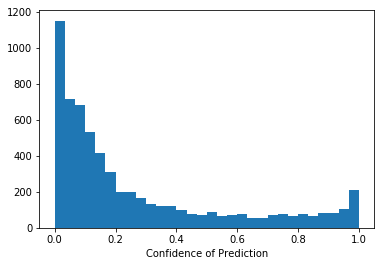

In [411]:
plt.hist(combined_final["Prediction Confidence"],bins=30)
plt.xlabel('Confidence of Prediction');

We can see the distribution of prediction confidence is right skewed.

Text(0.5,1,'Rating numerator Boxplot')

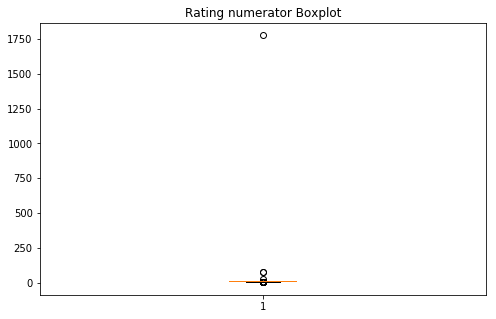

In [422]:
fig = plt.figure(figsize=(8, 5))
axes = plt.subplot(111)
plt.boxplot(twitter_clean['rating_numerator'])
plt.title("Rating numerator Boxplot")

We can see there is an outlier in the data, which is why the mean numerator is much higher than the median.